<a href="https://colab.research.google.com/github/TyapkinaPA/Lections-in-para/blob/main/March_lection_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Переопределение и перегрузка методов
- переопределение метода - прием в ооп, позволяющий классам-потомкам реализовывать новое поведение метода, определенного в родительском классе
- перегрузка метода - определение метода с тем же именем, но отличающегося в сигнатуре

In [ ]:
class A:
  def f(self, x):
    print(x)
class B(A):
  def f(self, x, y):
    print(x+y)
a = A()
a.f('Hello!')
b = B()
b.f('Hello, ' , 'World!')

Hello!
Hello,World!


In [ ]:
class A:
  def f(self, x):
    print(x)
class B(A):
  def f(self, x, y = None):
    if y is None:
      super().f(x)
    else:
      print(x + y)
b = B()
b.f('Hello!')
b.f('Hello, ' , 'World!')

Hello!
Hello, World!


In [ ]:
# Виртуальные методы
class A:
  def f(self):
    return 2
  def f_sq(self):
    return self.f()**2
class B(A):
  def f(self):
    return 5
a = A()
a.f_sq()
b = B()
b.f_sq()

25

In [ ]:
class A:
  def __f(self):
    return 2
  def f_sq(self):
    return self.__f()**2
class B(A):
  def __f(self):
    return 5
a = A()
a.f_sq()
b = B()
b.f_sq()


4

In [ ]:
# Наследование от встроенных классов
class Mydict(dict):
  def  __setitem__(self, key, value):
    super().__setitem__(key, [value]*2)

a = Mydict(key1 = 1)    # {'key1':1}
a['key2'] = 2     # {'key':1, 'key2':[2,2]}

# insert new key via update()
a.update(key3 = 3)
# {'key1':1, 'key2':[2,2], 'key3':3}
# update() use built-in implementation of __setitem__

In [ ]:
# Абстрактные классы
class Base(object):
  def virtualMethod(self):
    raise NotImplementedError()
  def usesVirtualMethod(self):
    return self.virtualMethod() + 1
class Derived(Base):
  def virtualMethod(self):
    return 1
Derived().usesVirtualMethod()

2

In [ ]:
# Декоратор @abstractmethod
from abc import ABC, abstractmethod
class MyAbstract(ABC):
  @abstractmethod
  def foo(self):
    pass
class MyClass(MyAbstract):
  def foo(self):
    print('Hello, world!')
a = MyClass()

In [ ]:
# Множественное наследование
class A:
  def m(self):
    print('In A')
class B(A):
  def m(self):
    print('In B')
class C(A):
  def m(self):
    print('In C')
class D(B, C):
  pass
d = D()
d.m()  

In B


In [ ]:
# Полиморфизм
class T1:
  n = 10
  def total(self, N):
    self.total = int(self.n) + int(N)
class T2:
  def total(self, s):
    self.total = len(str(s))
t1 = T1()
t2 = T2()
t1.total(45)
t2.total(45)
print(t1.total)
print(t2.total)

55
2


In [ ]:
from contextlib import redirect_stderr
class dectangle:
  def __init__(self, widtn, height, sign):
    self.w = int(widtn)
    self.h = int(height)
    self.s = str(sign)
  def __str__(self):
    rect = []
    for i in range(self.h):
      rect.append(self.s * self.w)
    rect ='\n'.join(rect)
    return rect
  def __add__(self, other):
    return dectangle(self.w + other.w, self.h + other.h, self.s)
a = dectangle(4, 2, 'w')
print(a)
b = dectangle(8, 3, 'z')
print(b)
print(a + b)
print(b + a)

wwww
wwww
zzzzzzzz
zzzzzzzz
zzzzzzzz
wwwwwwwwwwww
wwwwwwwwwwww
wwwwwwwwwwww
wwwwwwwwwwww
wwwwwwwwwwww
zzzzzzzzzzzz
zzzzzzzzzzzz
zzzzzzzzzzzz
zzzzzzzzzzzz
zzzzzzzzzzzz


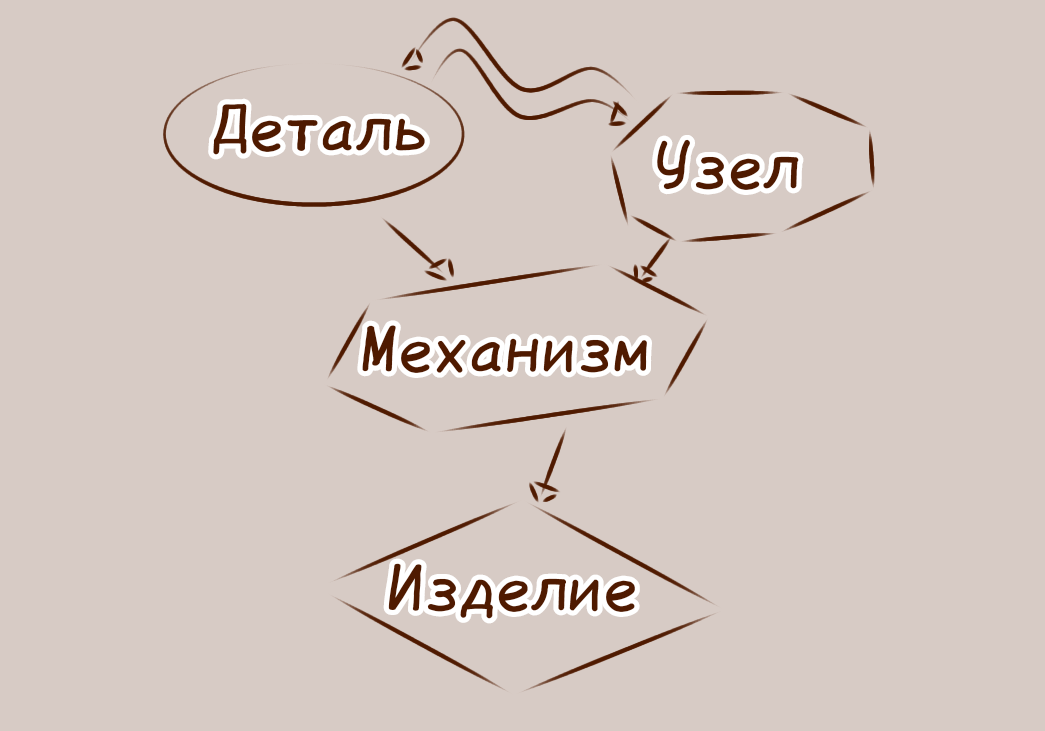

In [ ]:
class Detail:
  def __init__(self, name, material):
    self.name = name
    self.material = material

  def get_info(self):
    print("Деталь: {},\n Материал: {}".format(self.name, self.material))
    print('-' * 7)

class Mechanism(Detail):
  def __init__(self, name, material, description):
    super().__init__(name, material)
    self.description = description

  def get_info(self):
    print("Механизм: {},\n Материал: {},\n Описание: {}".format(self.name, self.material, self.description))
    print('-' * 7)

class Node(Mechanism):  
  def __init__(self, name, material, description, location):
    super().__init__(name, material, description)
    self.location = location

  def get_info(self):
    print("Узел: {},\n Материал: {},\n Описание: {},\n Локация: {}".format(self.name, self.material, self.description, self.location))
    print('-' * 7)

class Product:
  def __init__(self, name, nodes):
    self.name = name
    self.nodes = nodes

  def get_info(self):
    print("Изделие: {}".format(self.name))
    print("Узлы: ")
    print('= ' * 4)
    for node in self.nodes:
      node.get_info()

# Пример использования классов
detail1 = Detail("Винт", "Сталь")
detail1.get_info()

mechanism1 = Mechanism("Двигатель", "Алюминий", "4-цилиндровый, турбонаддув")
mechanism1.get_info()

node1 = Node("Коленчатый вал", "Сталь", "Преобразует линейное движение во вращательное", "Двигатель внутреннего сгорания")
node1.get_info()

node2 = Node("Поршень", "Алюминий", "Преобразует давление горения в линейное движение", "Двигатель внутреннего сгорания")
node2.get_info()

product1 = Product("Машина", [node1, node2])
product1.get_info()

Деталь: Винт,
 Материал: Сталь
-------
Механизм: Двигатель,
 Материал: Алюминий,
 Описание: 4-цилиндровый, турбонаддув
-------
Узел: Коленчатый вал,
 Материал: Сталь,
 Описание: Преобразует линейное движение во вращательное,
 Локация: Двигатель внутреннего сгорания
-------
Узел: Поршень,
 Материал: Алюминий,
 Описание: Преобразует давление горения в линейное движение,
 Локация: Двигатель внутреннего сгорания
-------
Изделие: Машина
Узлы: 
= = = = 
Узел: Коленчатый вал,
 Материал: Сталь,
 Описание: Преобразует линейное движение во вращательное,
 Локация: Двигатель внутреннего сгорания
-------
Узел: Поршень,
 Материал: Алюминий,
 Описание: Преобразует давление горения в линейное движение,
 Локация: Двигатель внутреннего сгорания
-------
